In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv('./data_for_lr.csv')
data = data.dropna() # Remove all empty row
train_X=data.x # take data from index 0 to 200
train_Y=data.y

train_X=tf.convert_to_tensor(train_X) # convert it into tensor
train_Y=tf.convert_to_tensor(train_Y)


Text(0, 0.5, 'Loss')

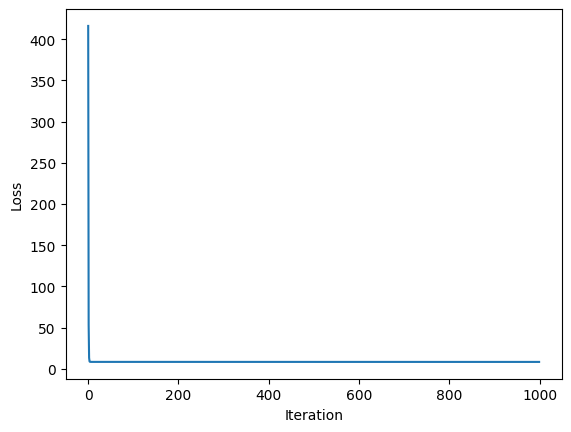

In [6]:
# Gradient Descent

learning_rate=0.0001
training_epochs=1000
display_step=50

W=tf.Variable(np.random.randn())
B=tf.Variable(np.random.randn())
losses =np.array([]) 
for i in range (training_epochs):
    with tf.GradientTape() as tape:
        predict_y=W*train_X.numpy()+B
        cur_loss=tf.reduce_mean(tf.square(predict_y-train_Y.numpy())) # reduce_mean() is used to find average of elements across dimensions of a tensor.
    gradients = tape.gradient(cur_loss, [W,B]) 
    W.assign_sub(learning_rate * gradients[0]) 
    B.assign_sub(learning_rate * gradients[1])
    losses=np.append(losses,cur_loss.numpy())
plt.plot(losses) 
plt.xlabel("Iteration") 
plt.ylabel("Loss")

(0.0, 120.0, 0.0, 120.0)

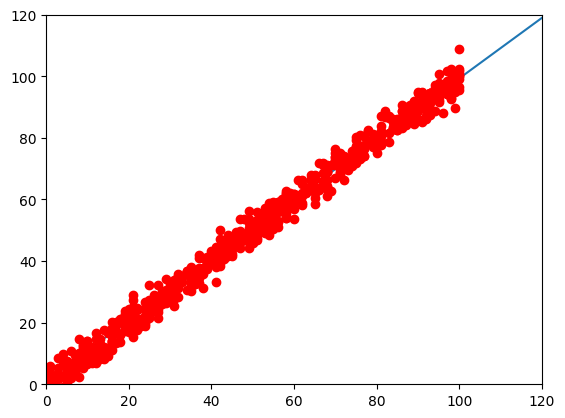

In [7]:

x = np.linspace(0, 120, 121)
y = W.numpy() * x + B.numpy()
plt.plot(x, y)
plt.plot(train_X.numpy(),train_Y.numpy(),'ro')
plt.axis([0,120,0,120])

In [ ]:
# Stochastic Gradient Descent

learning_rate=0.001
training_epochs=500
display_step=50
batch_size=300

losses =np.array([])
length=len(train_X)

indices=np.arange(0,length-1,1) # np.arrange(start,end,step) # create an array containing evenly spaced values within a specified range
# Ex np.arange(0, 10, 2) = [0,2,4,6,8,10]
for i in range (training_epochs):
    np.random.shuffle(indices) # shuffle an array
    for j in range(batch_size-1,length-1,batch_size):
        batch_X=np.array([])
        batch_Y=np.array([])
        for z in range(j-batch_size-1,j):
            batch_X=np.append(batch_X,train_X[indices[z]].numpy())
            batch_Y=np.append(batch_Y,train_Y[indices[z]].numpy())
        with tf.GradientTape() as tape:
            y_predict=W*batch_X+B
            current=tf.reduce_mean(tf.square(y_predict-batch_Y))
        radients = tape.gradient(current, [W,B]) 
        W.assign_sub(learning_rate * gradients[0]) 
        B.assign_sub(learning_rate * gradients[1])
        losses=np.append(losses,current.numpy())
plt.plot(losses) 
plt.xlabel("Iteration") 
plt.ylabel("Loss")

(0.0, 120.0, 0.0, 120.0)

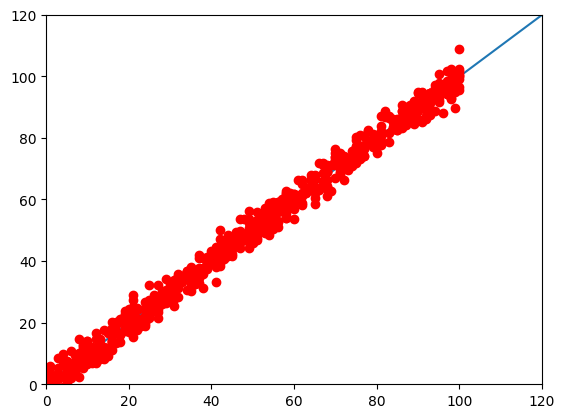

In [ ]:
x = np.linspace(0, 120, 121)
y = W.numpy() * x + B.numpy()
plt.plot(x, y)
plt.plot(train_X.numpy(),train_Y.numpy(),'ro')
plt.axis([0,120,0,120])

In [ ]:

from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()
Xtrain=data[['x']]
Ytrain=data.y
model.fit(Xtrain,Ytrain)

LinearRegression()

[1.00065638]
-0.10726546430095141


(0.0, 120.0, 0.0, 120.0)

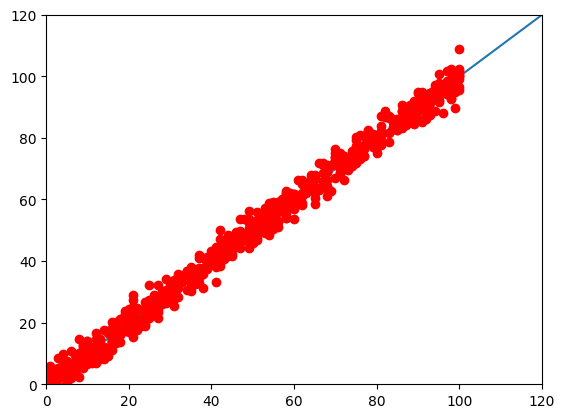

In [15]:
print(model.coef_) # W
print(model.intercept_) #B
W=model.coef_
B=model.intercept_
x = np.linspace(0, 120, 121)
y = W * x + B
plt.plot(x, y)
plt.plot(train_X.numpy(),train_Y.numpy(),'ro')
plt.axis([0,120,0,120])